In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

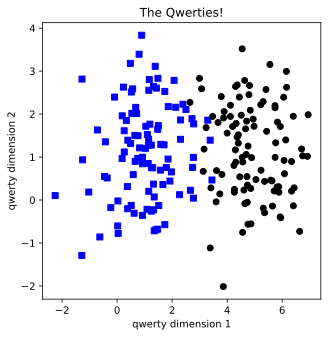

In [2]:
# create data

nPerCluster = 100
blur = 1

# center (origin) of the data on x-y plane
A = [1, 1]
B = [5, 1]

# generate data
a = [A[0]+np.random.randn(nPerCluster)*blur, A[1]+np.random.randn(nPerCluster)*blur]
b = [B[0]+np.random.randn(nPerCluster)*blur, B[1]+np.random.randn(nPerCluster)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerCluster, 1)), np.ones((nPerCluster, 1))))

# concatenate into a matrix
data_np = np.hstack((a, b)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0], 0], data[np.where(labels==0)[0], 1],'bs')
plt.plot(data[np.where(labels==1)[0], 0], data[np.where(labels==1)[0], 1],'ko')
plt.title('The Qwerties!')
plt.xlabel('qwerty dimension 1')
plt.ylabel('qwerty dimension 2')
plt.show()

In [27]:
def createModel(learningRate):
    ANNModel = nn.Sequential(
        nn.Linear(2,16), # the data is 2 dimensional (x value and y value)
        nn.ReLU(),
        nn.Linear(16,32),
        nn.ReLU(),
        nn.Linear(32,1),
        nn.ReLU(),
        nn.Linear(1,1),
        nn.Sigmoid()
    )

    lossFunction = nn.BCELoss()

    optimizer = torch.optim.SGD(ANNModel.parameters(), lr=learningRate)

    return ANNModel, lossFunction, optimizer

In [21]:
epochs = 2000
def trainModel(ANNModel, lossFunction, optimizer):
    losses = torch.zeros(epochs)

    for epoch in range(epochs):

        # forward pass
        yHat = ANNModel(data)

        # compute loss
        loss = lossFunction(yHat, labels)
        losses[epoch] = loss

        # backpropagate
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    predictions = ANNModel(data)

    totalAcc = 100*torch.mean(((predictions > 0.5) == labels).float())
    # using predictions > 0.5 because we're using BCELoss with explicit Sigmoid in the model.

    return losses, predictions, totalAcc

Final Accuracy: 97%


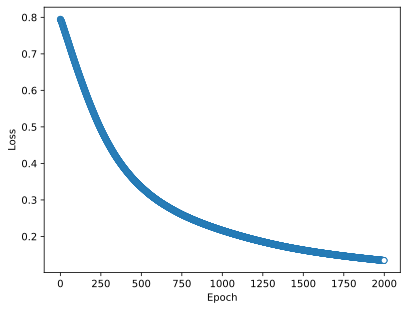

In [30]:
# Testing the code by running it once

ANNModel, lossFunction, optimizer = createModel(0.01)
losses, predictions, totalAcc = trainModel(ANNModel, lossFunction, optimizer)

print('Final Accuracy: %g%%' %totalAcc)

plt.plot(losses.detach(), 'o', markerfacecolor='w', linewidth=0.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [31]:
# Now for the experiment

learningRates = np.linspace(0.001, 0.1, 50)

accByLR = []
allLosses = np.zeros((len(learningRates), epochs))

for i, lr in enumerate(learningRates):
    ANNModel, lossFunction, optimizer = createModel(lr)
    losses, predictions, totalAcc = trainModel(ANNModel, lossFunction, optimizer)

    accByLR.append(totalAcc)
    allLosses[i,:] = losses.detach()

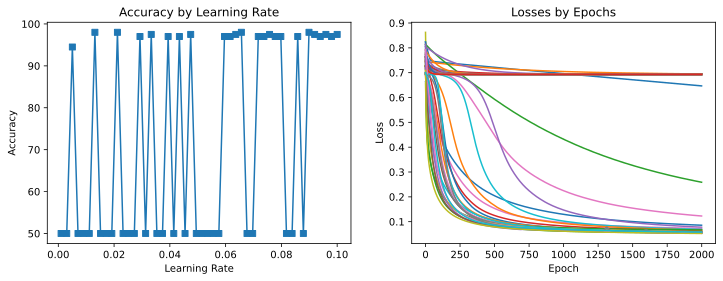

In [32]:
fig, ax = plt.subplots(1,2, figsize=(12, 4))

ax[0].plot(learningRates, accByLR, 's-')
ax[0].set_xlabel('Learning Rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by Learning Rate')

ax[1].plot(allLosses.T)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].set_title('Losses by Epochs')
plt.show()